In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import xlsxwriter as xw
import pytz
from scipy.stats import spearmanr

%matplotlib inline

In [2]:
path = '../Scores/'

In [104]:
scores = pd.read_excel(path+'MotorTasks.xls')
updrs = pd.read_excel(path+'MDS-UPDRS.xls')

In [4]:
scores.Subject.unique()

array([1004, 1016, 1018, 1024, 1038, 1030])

In [5]:
updrs.Subject.unique()

array([1004, 1016, 1018, 1019, 1020, 1024, 1038])

In [6]:
tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
        'Alternating right hand movements overall score (Q56)','Alternating left hand movements overall score (Q65)',
        'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
        'Typing on a computer keyboard overall score (Q92)',
        'Assembling nuts and bolts overall score (Q102)','Taking a glass of water and drinking overall score (Q112)',
        'Organizing sheets in a folder overall score (Q122)','Folding towels overall score (Q132)',
        ]

In [7]:
scores_overall = pd.concat([scores.iloc[:,:4],scores[tests]],axis=1)

In [8]:
scores_overall['State'] = scores.iloc[:,6]

In [9]:
scores_overall.head()

,Site,Subject,Visit,CRF#,Standing overall score (Q10),Walking overall score (Q18),Walking while counting overall score (Q28),Alternating right hand movements overall score (Q56),Alternating left hand movements overall score (Q65),Sit to stand overall score (Q74),Drawing on a paper overall score (Q82),Typing on a computer keyboard overall score (Q92),Assembling nuts and bolts overall score (Q102),Taking a glass of water and drinking overall score (Q112),Organizing sheets in a folder overall score (Q122),Folding towels overall score (Q132),State
0,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 0,438,0,1,1.0,1,2,0,1,2,1,1,2,1,Off
1,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 30,447,0,1,1.0,0,1,0,1,0,1,1,0,0,Off
2,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 60,449,0,0,0.0,0,0,0,0,0,1,0,0,0,On
3,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 90,452,0,0,0.0,0,1,0,0,0,1,0,0,0,On
4,"Northwestern Memorial Hospital, Chicago, IL",1004,2 Weeks: Time 120,454,0,0,0.0,0,1,0,0,0,1,0,0,0,On


In [10]:
scores_overall.iloc[:,4:].describe()

/Users/luca/anaconda/envs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Standing overall score (Q10),Walking overall score (Q18),Walking while counting overall score (Q28),Alternating right hand movements overall score (Q56),Alternating left hand movements overall score (Q65),Sit to stand overall score (Q74),Drawing on a paper overall score (Q82),Typing on a computer keyboard overall score (Q92),Assembling nuts and bolts overall score (Q102),Taking a glass of water and drinking overall score (Q112),Organizing sheets in a folder overall score (Q122),Folding towels overall score (Q132)
count,36.000000,36.000000,34.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.444444,0.750000,0.852941,0.777778,1.361111,0.750000,0.777778,1.277778,1.194444,0.722222,0.888889,0.583333
std,0.772545,0.874234,0.609637,0.590937,0.592948,0.967323,0.760117,0.778684,0.624246,0.701472,0.622336,0.603561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.750000,0.000000
50%,0.000000,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,NaN,1.000000,2.000000,1.250000,1.000000,2.000000,1.250000,1.000000,1.000000,1.000000
max,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,3.000000,3.000000,2.000000,2.000000


In [11]:
scoresOFF = scores_overall[scores_overall['State']=='Off']
scoresON = scores_overall[scores_overall['State']=='On']

In [ ]:
# fig = plt.figure(figsize=(16,8))
# ax1 =fig.add_subplot(121)
# sns.heatmap(scoresOFF.iloc[:,4:-1],vmin=0.0,vmax=4.0)
# ax2 = fig.add_subplot(122)
# sns.heatmap(scoresON.iloc[:,4:-1],vmin=0.0,vmax=4.0)

/Users/luca/anaconda/envs/py35/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


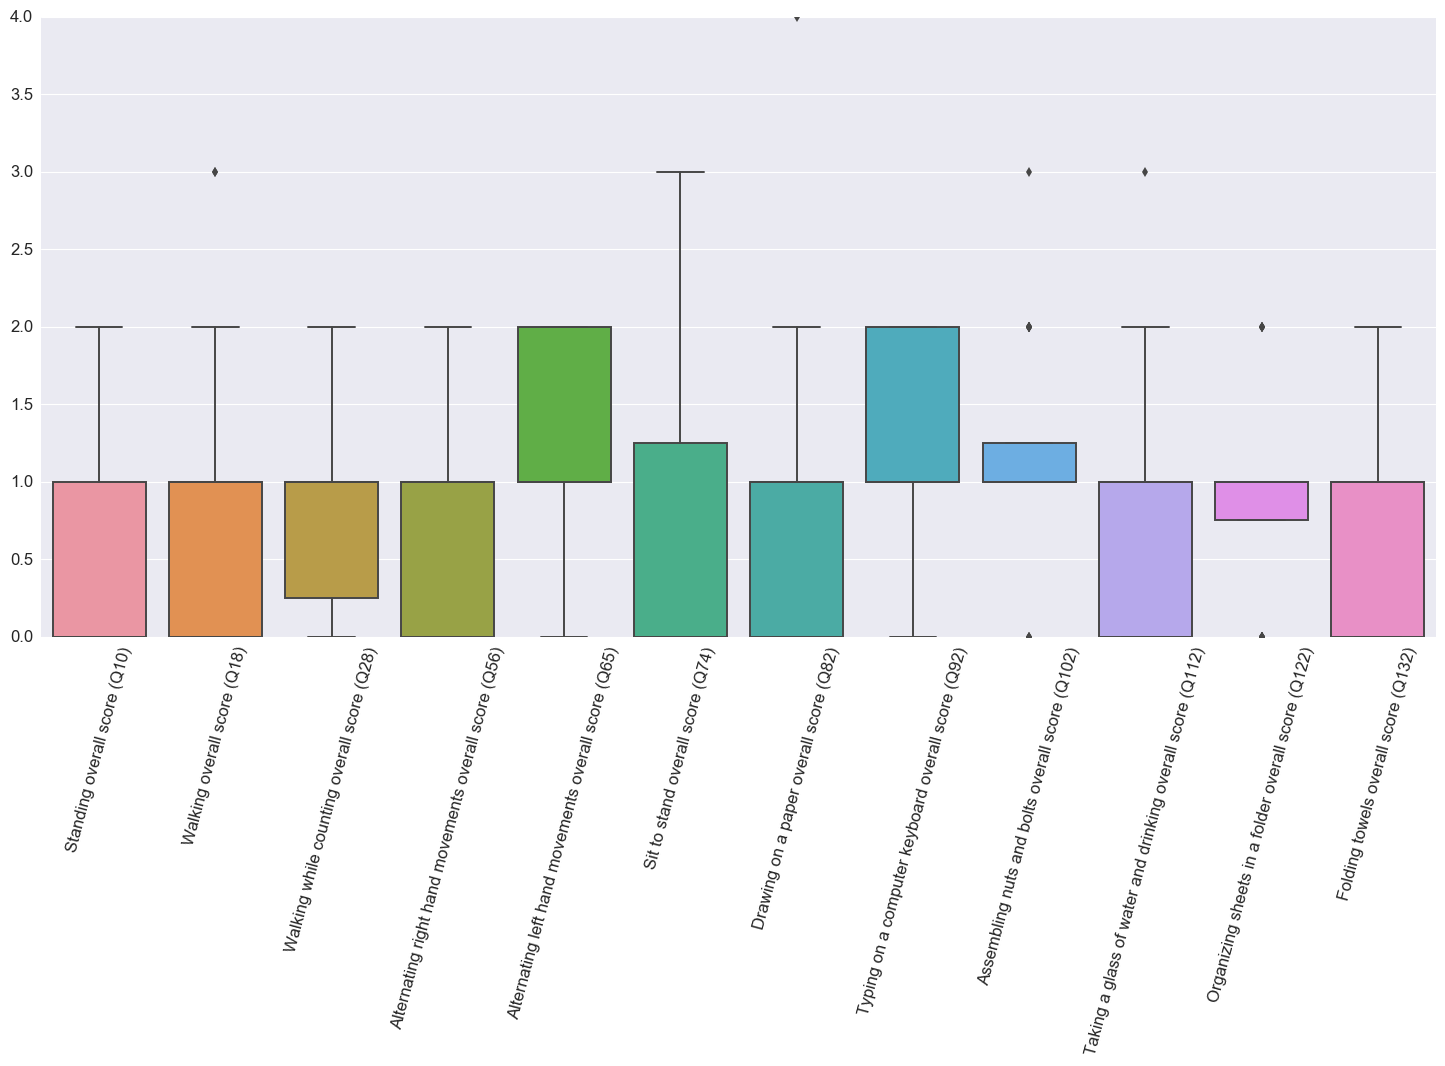

In [13]:
plt.figure(figsize=(18,8))
sns.set_context('paper',font_scale=1.5)
g = sns.boxplot(scores_overall.iloc[:,4:])
g = plt.xticks(rotation=75)

In [96]:
#plot motor scores over time
mot_tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
                     'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
                    'Typing on a computer keyboard overall score (Q92)',
                    'Taking a glass of water and drinking overall score (Q112)']

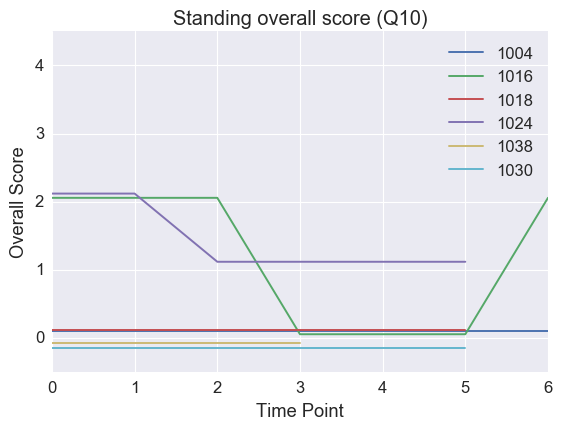

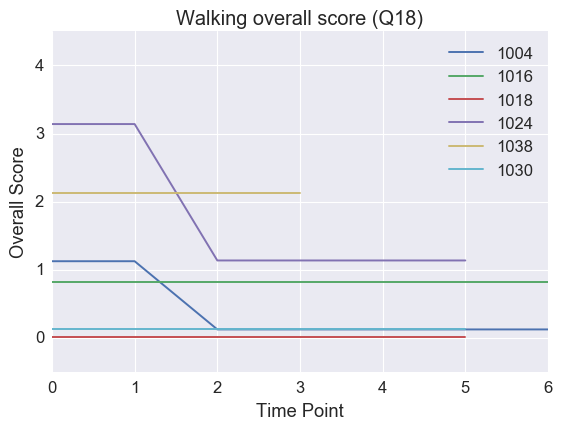

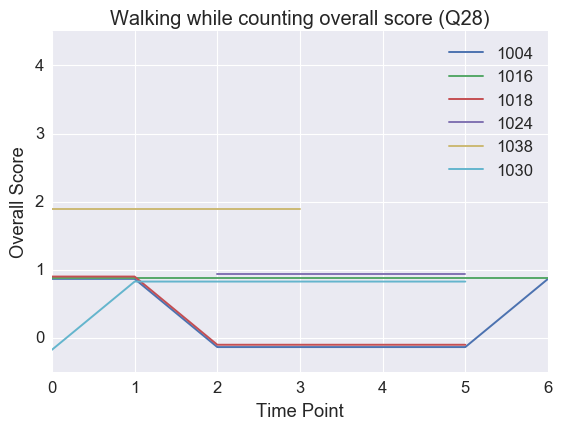

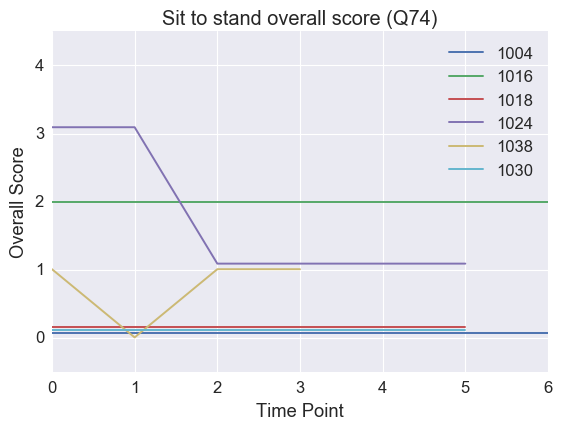

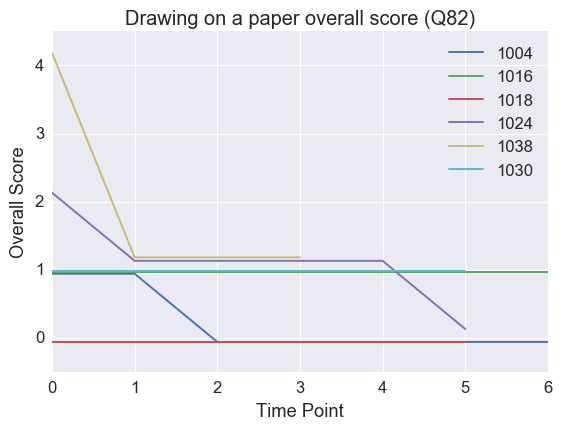

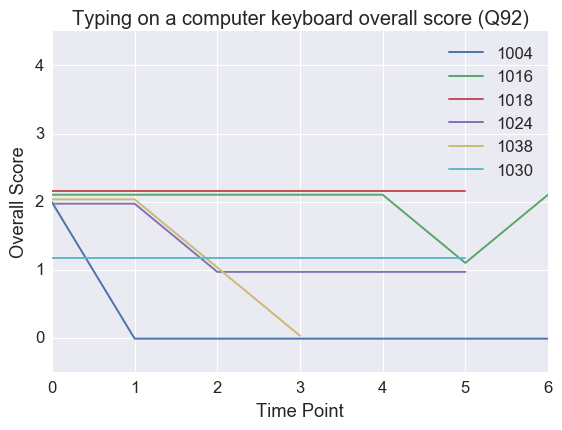

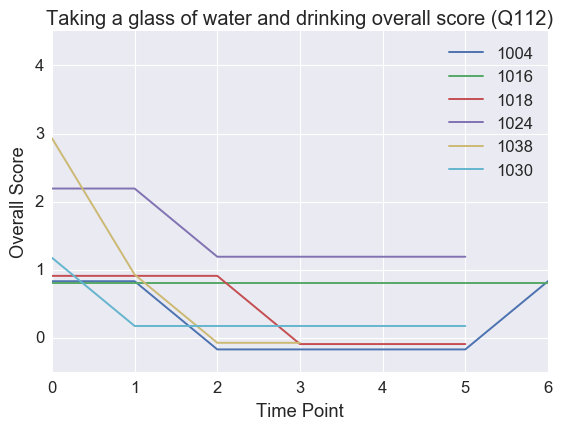

In [99]:
for t in mot_tests:
    plt.figure()
    for s in scores_overall['Subject'].unique():
        plt.plot(scores_overall.loc[scores_overall['Subject']==s,t].values+np.random.uniform(-0.2,0.2))
        plt.legend(scores_overall['Subject'].unique())

    plt.xlabel('Time Point')
    plt.ylabel('Overall Score')
    plt.title(t)
    plt.ylim(-0.5,4.5)

Questions: 
* The score for some patients remains constant. Does it mean they are always 'ON'? Are they non-fluctuators?
* Can we assume 0 as Healthy - and measure being On or Off relative to that?
* One person moved from 0 to 1 (1030) on walking on counting after taking the medicine - Subjectivity of the scores?

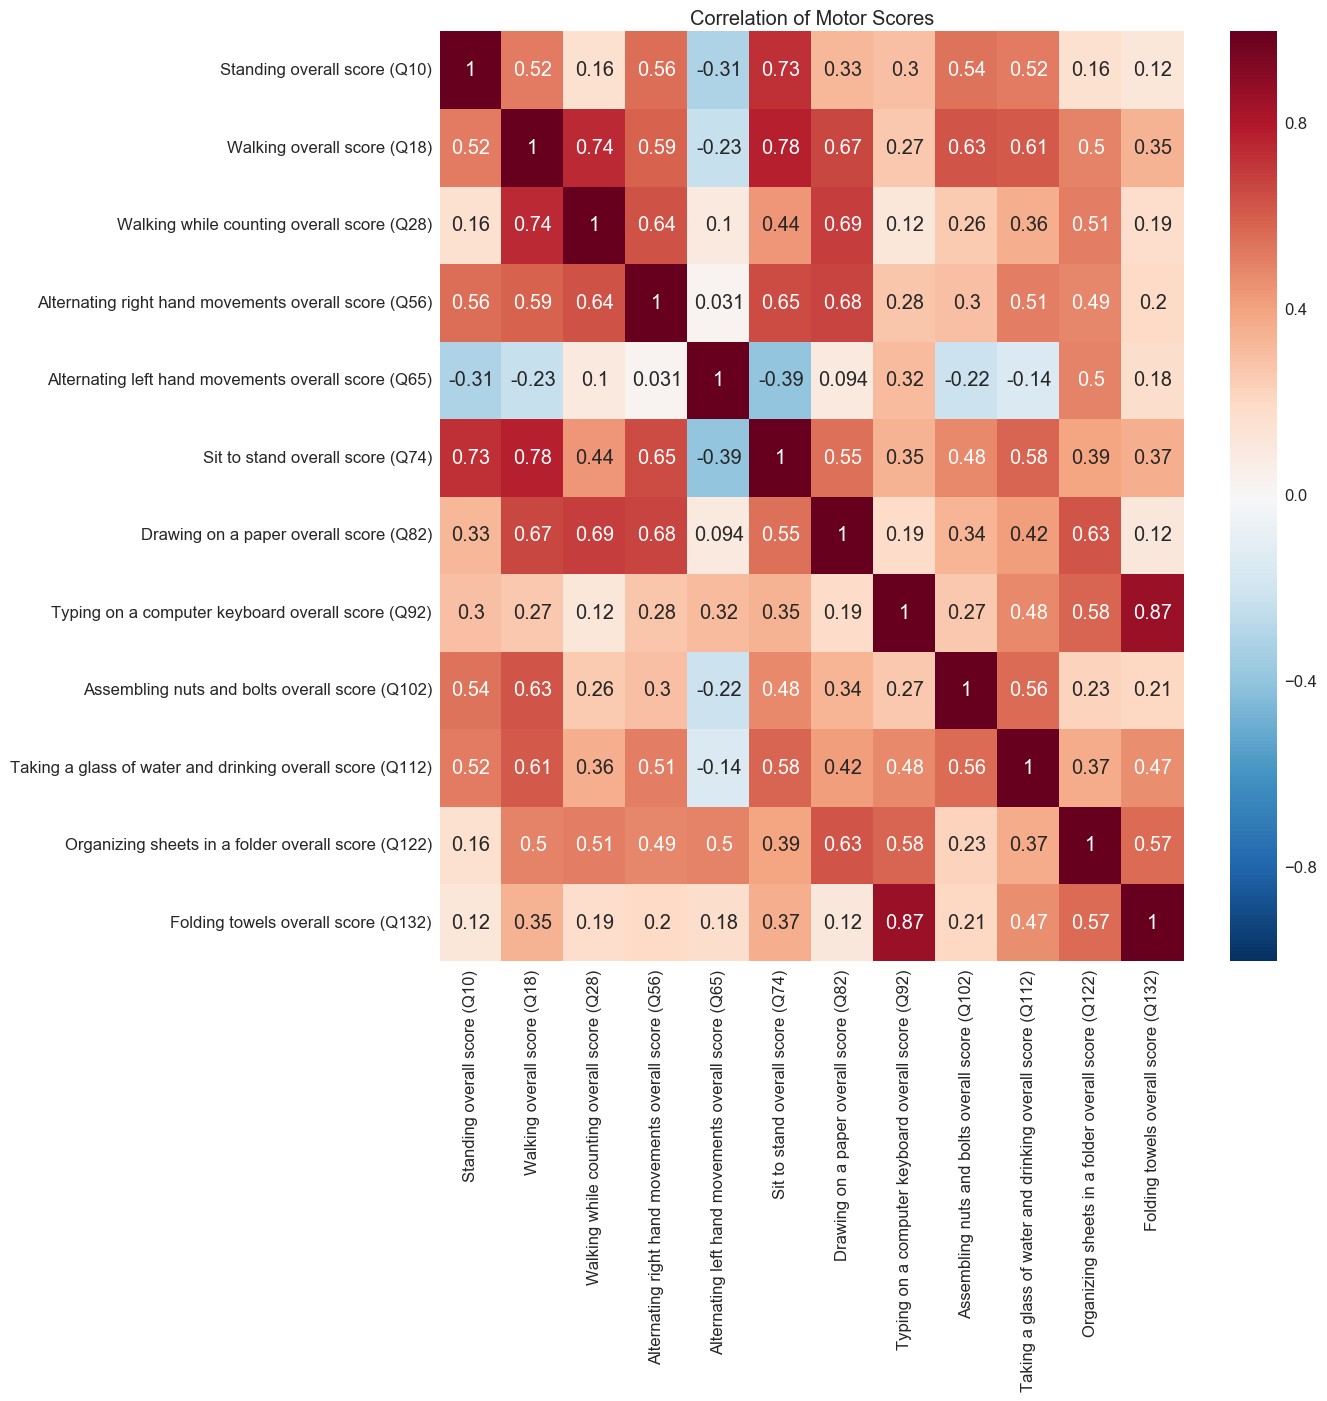

In [101]:
#correlation of scores
plt.figure(figsize=(12,12))
sns.heatmap(scores_overall.iloc[:,4:-1].corr(method='spearman'),annot=True)
plt.title('Correlation of Motor Scores')

In [105]:
#select common subjects and only 1st 2 tests (off and on) to match with UPDRS
s1 = set(scores.Subject.unique())
s2 = set(scores.Subject.unique())
subj = s1&s2
mot_scores = scores_overall[scores_overall['Subject'].isin(list(subj))]
mot_scores = mot_scores[(mot_scores['Visit']=='2 Weeks: Time 0') | (mot_scores['Visit']=='2 Weeks: Time 60') ]
mot_scores = mot_scores.sort_values('Subject')

In [106]:
#correlation of ADLs motor scores and UPDRS scores
updrs_tests = ['3.4 Finger Tapping - Right Hand (Q40)','3.4 Finger Tapping - Left Hand (Q41)',
               '3.5 Hand Movements - Right Hand (Q42)','3.5 Hand Movements - Left Hand (Q43)',
               '3.6 Pronation-Supination Movements of Hands - Right Hand (Q44)',
               '3.6 Pronation-Supination Movements of Hands - Left Hand (Q45)',
               '3.7 Toe Tapping - Right Foot (Q46)','3.7 Toe Tapping - Left Foot (Q47)',
            '3.8 Leg Agility - Right Leg (Q48)','3.8 Leg Agility - Left Leg (Q49)','3.9 Arising From Chair (Q50)',
              '3.10 Gait (Q51)','3.11 Freezing of Gait (Q52)','3.12 Postural Stability (Q53)',
              '3.13 Posture (Q54)','3.15 Postural Tremor of the Hands - Right Hand (Q56)',
              '3.15 Postural Tremor of the Hands - Left Hand (Q57)',
               '3.16 Kinetic Tremor of the Hands - Right Hand (Q58)',
              '3.16 Kinetic Tremor of the Hands - Left Hand (Q59)',
               '3.17 Rest Tremor Amplitude - Right Upper Extremity (Q60)','3.17 Rest Tremor Amplitude - Left Upper Extremity (Q61)',
               '3.17 Rest Tremor Amplitude - Right Lower Extremity (Q62)','3.17 Rest Tremor Amplitude - Right Lower Extremity (Q62)',
               '3.17 Rest Tremor Amplitude - Left Lower Extremity (Q63)','3.18 Constancy of Rest Tremor (Q65)',               
              ]

In [115]:
mot_tests = ['Standing overall score (Q10)','Walking overall score (Q18)','Walking while counting overall score (Q28)',
                     'Sit to stand overall score (Q74)','Drawing on a paper overall score (Q82)',
                    'Typing on a computer keyboard overall score (Q92)',
                    'Taking a glass of water and drinking overall score (Q112)']

In [116]:
updrs = updrs.sort_values('Subject')

In [117]:
mot_scores.index = updrs.index

In [118]:
mot_scores.iloc[:,4:-1][mot_tests]

,Standing overall score (Q10),Walking overall score (Q18),Walking while counting overall score (Q28),Sit to stand overall score (Q74),Drawing on a paper overall score (Q82),Typing on a computer keyboard overall score (Q92),Taking a glass of water and drinking overall score (Q112)
0,0,1,1.0,0,1,2,1
1,0,0,0.0,0,0,0,0
2,2,1,1.0,2,1,2,1
3,2,1,1.0,2,1,2,1
4,0,0,1.0,0,0,2,1
5,0,0,0.0,0,0,2,1
6,2,3,NaN,3,2,2,2
7,1,1,1.0,1,1,1,1
8,0,0,0.0,0,1,1,1
9,0,0,1.0,0,1,1,0


In [119]:
mot_updrs_scores = pd.concat([mot_scores.iloc[:,4:-1][mot_tests],updrs[updrs_tests]],axis=1)

In [126]:
mot_updrs_scores[['Walking overall score (Q18)','3.10 Gait (Q51)']]

,Walking overall score (Q18),3.10 Gait (Q51)
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,0,0
6,3,1
7,1,0
8,0,0
9,0,3


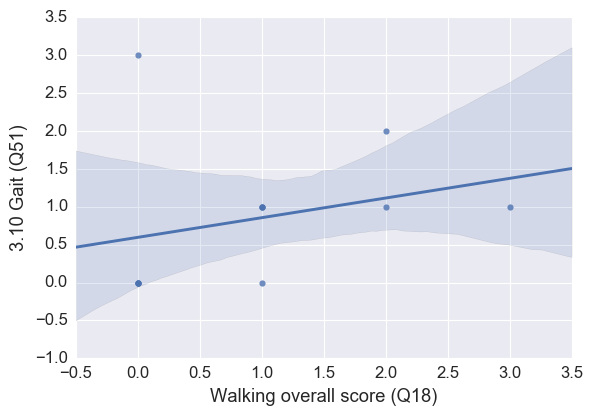

In [125]:
sns.regplot(x='Walking overall score (Q18)',y='3.10 Gait (Q51)',data=mot_updrs_scores)

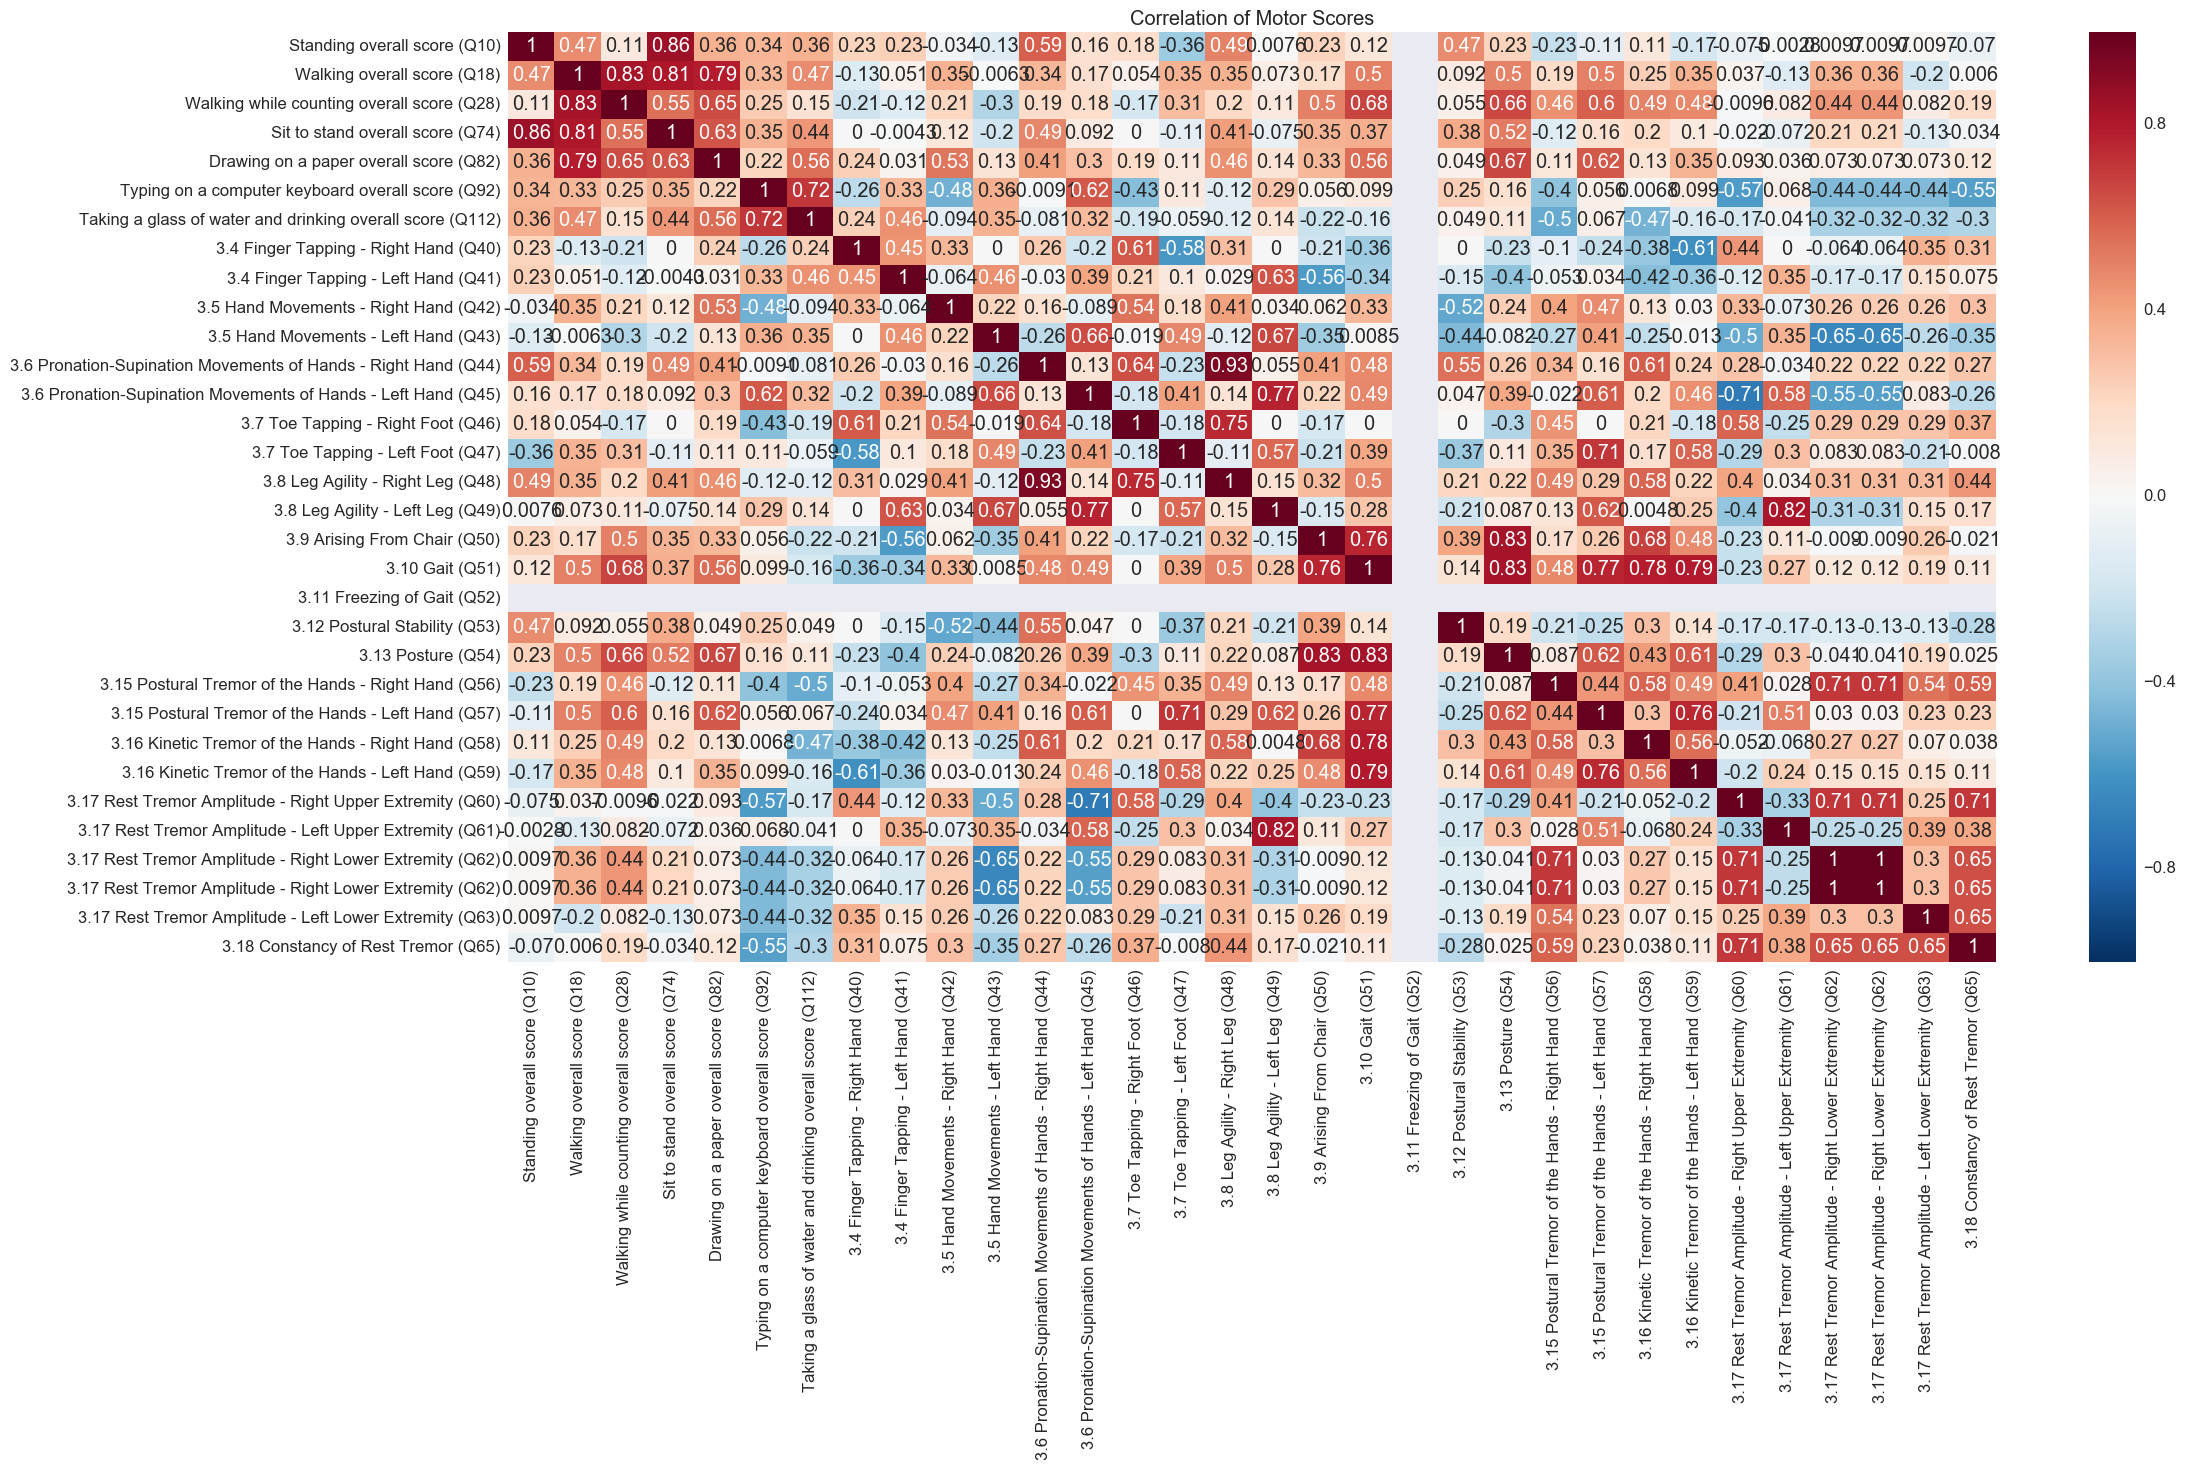

In [120]:
#correlation of scores
plt.figure(figsize=(24,12))
sns.heatmap(mot_updrs_scores.corr(method='spearman'),annot=True,vmin=-1,vmax=1)
plt.title('Correlation of Motor Scores')

* No strong correlations between motor scores and UPDRS scores across activities, even for same activity (look at Gait and Walking)
* Right hand pronation-supination (Q44) highly correlated with right leg agility
* Gait (Q51) strongly correlated with Posture (54), Postural tremor of Left Hand (57) and Kinetic tremor of both hands (58.59)